In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [2]:
import pandas as pd

df = pd.read_csv('./pokemon.csv')
print(df.head())

         Name  Type1   Type2
0   bulbasaur  Grass  Poison
1     ivysaur  Grass  Poison
2    venusaur  Grass  Poison
3  charmander   Fire     NaN
4  charmeleon   Fire     NaN


In [3]:
#데이터의 type확인
numerical_feats = df.dtypes[df.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df.dtypes[df.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  0
Number of Categorical features:  3


In [4]:
print('numerical_feats : ',df[numerical_feats].columns)
print("*"*80)
print('categorical_feats : ',df[categorical_feats].columns)

numerical_feats :  Index([], dtype='object')
********************************************************************************
categorical_feats :  Index(['Name', 'Type1', 'Type2'], dtype='object')


In [5]:
print(df['Type1'].sort_values().unique())
print(df['Type2'].sort_values().unique())

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water' nan]


In [6]:
print(df.isnull().sum())

Name       0
Type1      0
Type2    404
dtype: int64


In [7]:
df['Type2'].fillna('non_type',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   809 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


C:\Users\USER\anaconda3\envs\dacon2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

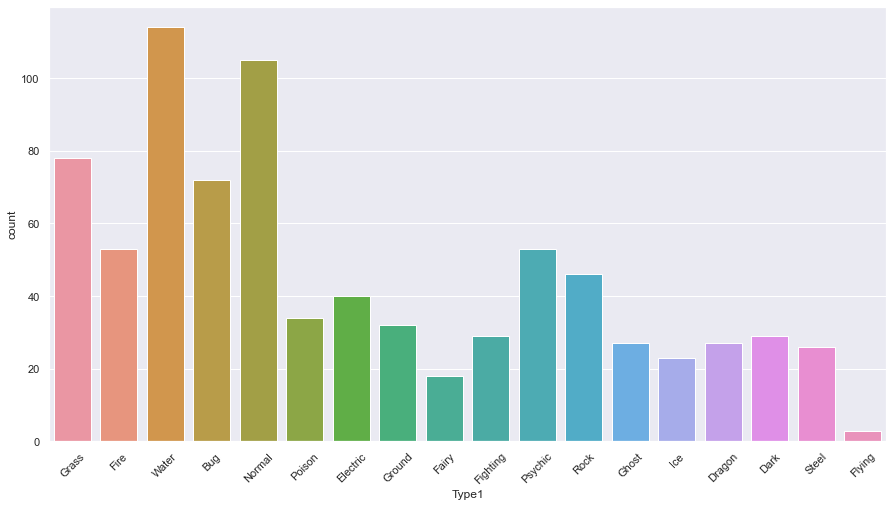

In [9]:
Y_train = df["Type1"]

# Drop 'label' column
X_train = df.drop(labels = ["Type1"],axis = 1) 

# free some space
#del df

sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(rotation = 45 )
g = sns.countplot(Y_train)
Y_train.value_counts()

C:\Users\USER\anaconda3\envs\dacon2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


non_type    404
Flying       95
Poison       32
Ground       32
Fairy        29
Psychic      29
Fighting     25
Steel        23
Grass        19
Dragon       18
Water        17
Dark         17
Ghost        16
Rock         14
Ice          11
Fire         11
Electric      8
Bug           5
Normal        4
Name: Type2, dtype: int64

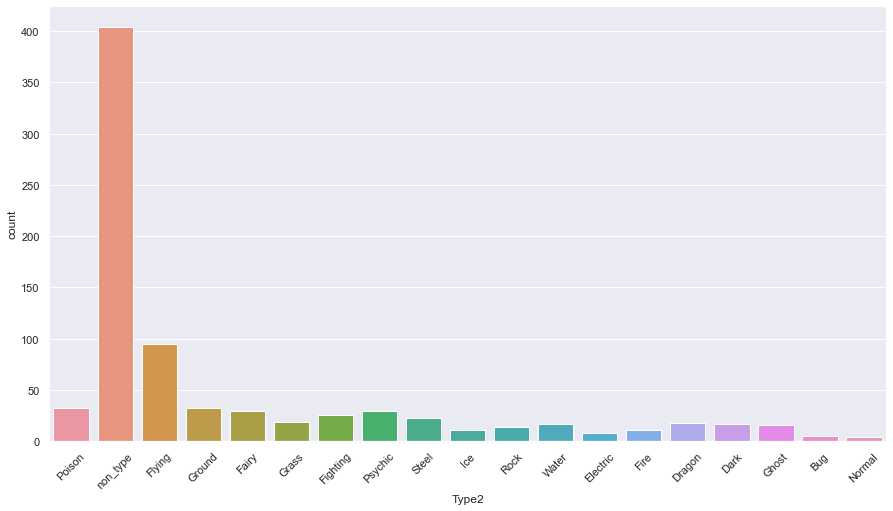

In [10]:
Y_train_2 = df["Type2"]

# Drop 'label' column
X_train_2 = df.drop(labels = ["Type2"],axis = 1) 

# free some space
#del df

sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(rotation = 45 )
g = sns.countplot(Y_train_2)
Y_train_2.value_counts()

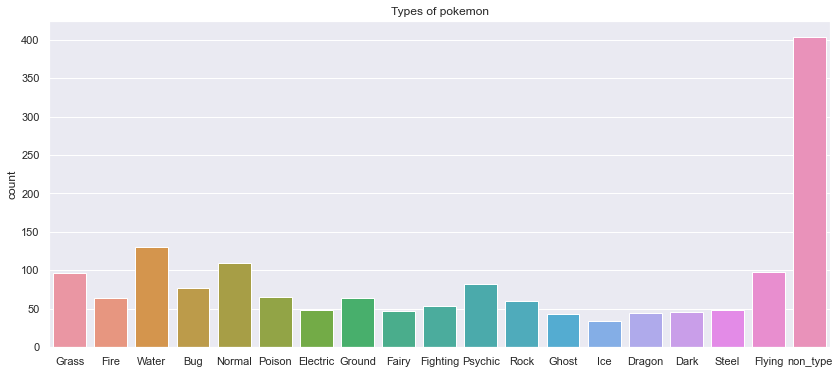

In [11]:
type1 = df['Type1'].tolist()
type2 = df['Type2'].tolist()

typo = type1 + type2

plt.figure(figsize=(14, 6))

sns.countplot(x=typo)
plt.title('Types of pokemon')
plt.show()

In [12]:
x1 = df.Type1.value_counts().keys()
y1 = df.Type1.value_counts().values
x2 = df.Type2.value_counts().keys()
y2 = df.Type2.value_counts().values

In [13]:
xy1 = pd.DataFrame({'x1':x1, 'y1':y1})
xy2 = pd.DataFrame({'x2':x2, 'y2': y2})
xy1.sort_values(by=['x1'],ascending=True, inplace=True)
xy2.sort_values(by=['x2'],ascending=True, inplace=True)

C:\Users\USER\anaconda3\envs\dacon2\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


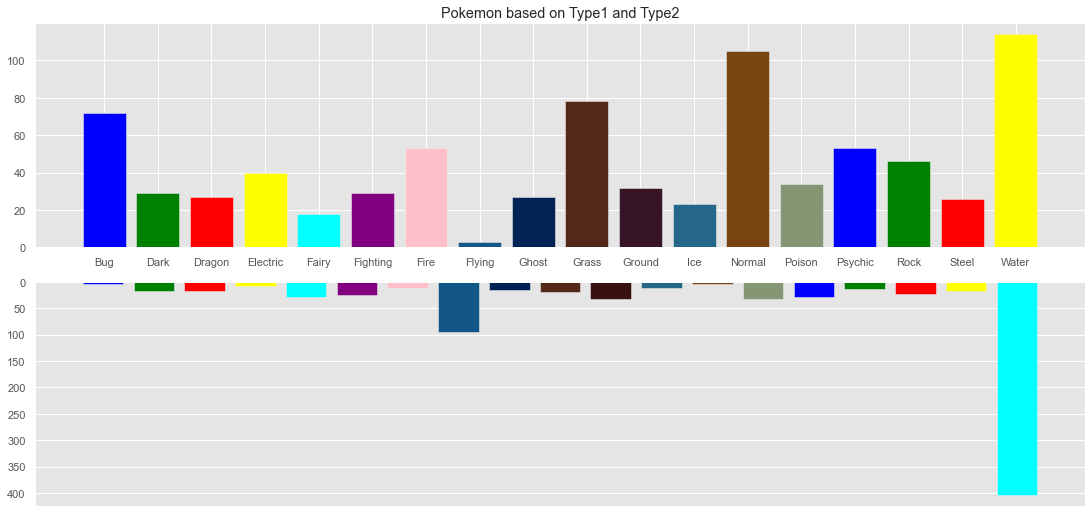

In [14]:
import matplotlib.gridspec as gridspec

plt.style.use('ggplot')
plt.figure(figsize=(30, 7))
gspec = gridspec.GridSpec(2, 2)
tp = plt.subplot(gspec[0, 1])
bt = plt.subplot(gspec[1, 1:])

tp.bar(xy1.x1,xy1.y1, color=['blue', 'green', 'red',
                             'yellow', 'cyan', 'purple',
                             'pink', '#135688', '#002255',
                             '#532819', '#381526', '#256789',
                            '#784512', '#859674'])
bt.bar(xy2.x2, xy2.y2, color=['blue', 'green', 'red',
                             'yellow', 'cyan', 'purple',
                             'pink', '#135688', '#002255',
                             '#532819', '#381111', '#256789',
                            '#784512', '#859674'])
bt.invert_yaxis()
bt.set_xticks([])
plt.tight_layout()
tp.set_title('Pokemon based on Type1 and Type2')
plt.show()

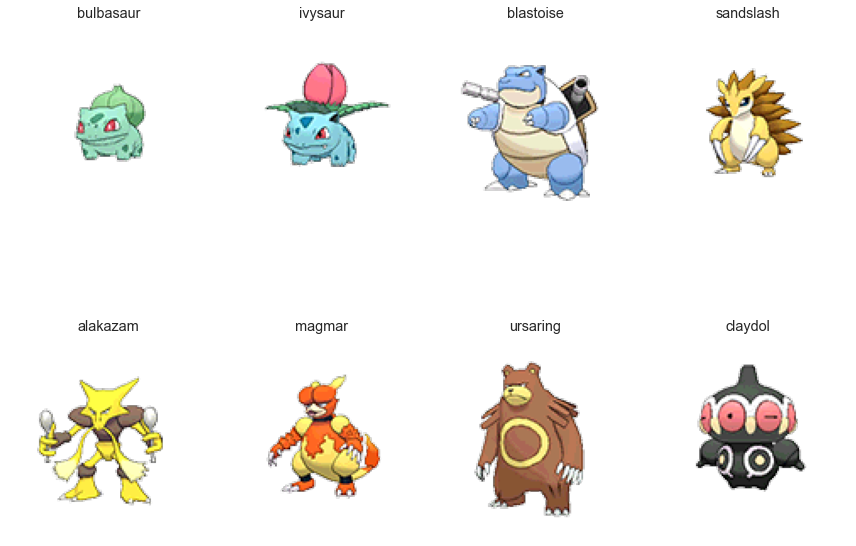

In [15]:
path = './dataset/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
    

In [16]:
import os

img_name = sorted(os.listdir('./dataset/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
df['filepath'] = img_paths

train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    vertical_flip=False,  # randomly flip images    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = train_datagen.flow_from_dataframe(
    df, 
    x_col='filepath', y_col='Type1',
    target_size=(224, 224), 
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    df , x_col='filepath', y_col='Type1',
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 648 validated image filenames belonging to 18 classes.
Found 161 validated image filenames belonging to 18 classes.


C:\Users\USER\anaconda3\envs\dacon2\lib\site-packages\PIL\Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


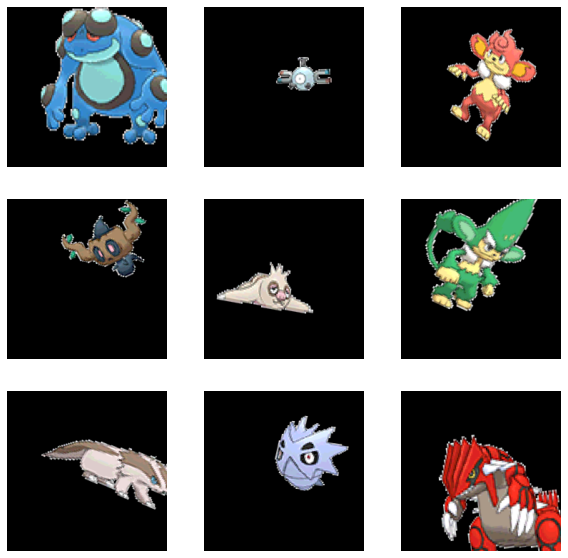

In [17]:
image_sample = train_generator.next()[0]

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

In [18]:
image_sample.shape

(32, 224, 224, 3)

In [19]:
import cv2
# image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)
# image_sample.shape

In [20]:
from tensorflow import keras
import tensorflow as tf

model = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=18,
    classifier_activation ='softmax'
)

In [21]:
# from tensorflow import keras
# model = keras.models.Sequential()

# model.add(keras.layers.Dense(4, input_shape=(120, 120, 4)))

# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# #model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
# #model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
# #model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
# #model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2, 2))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(1024, activation='relu'))
# model.add(keras.layers.Dense(512, activation='relu'))
# model.add(keras.layers.Dense(128, activation='relu'))

# model.add(keras.layers.Dense(18, activation='softmax'))

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [23]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [24]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=32, 
    epochs=50, 
    callbacks=[learning_rate_reduction]
    #callbacks=[
    #    tf.keras.callbacks.ReduceLROnPlateau(), 
    #    callbacks
    #]
)

Epoch 1/50
21/21 [==============================] - 98s 5s/step - loss: 4.3148 - acc: 0.1019 - val_loss: 2.8402 - val_acc: 0.1863
Epoch 2/50
21/21 [==============================] - 97s 5s/step - loss: 3.0921 - acc: 0.1127 - val_loss: 2.8021 - val_acc: 0.1304
Epoch 3/50
21/21 [==============================] - 99s 5s/step - loss: 2.9312 - acc: 0.1142 - val_loss: 2.7291 - val_acc: 0.1925
Epoch 4/50
21/21 [==============================] - 102s 5s/step - loss: 2.9126 - acc: 0.1049 - val_loss: 2.7398 - val_acc: 0.1429
Epoch 5/50
21/21 [==============================] - 101s 5s/step - loss: 2.8616 - acc: 0.1250 - val_loss: 2.7458 - val_acc: 0.1429
Epoch 6/50
21/21 [==============================] - ETA: 0s - loss: 2.8922 - acc: 0.1173
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
21/21 [==============================] - 100s 5s/step - loss: 2.8922 - acc: 0.1173 - val_loss: 2.8110 - val_acc: 0.1429
Epoch 7/50
21/21 [==============================] - 100s 5s

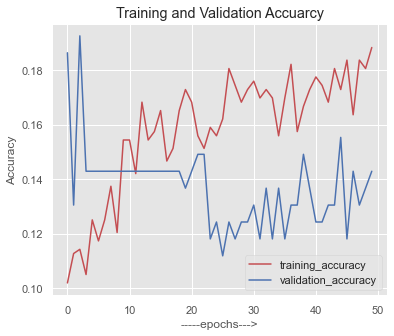

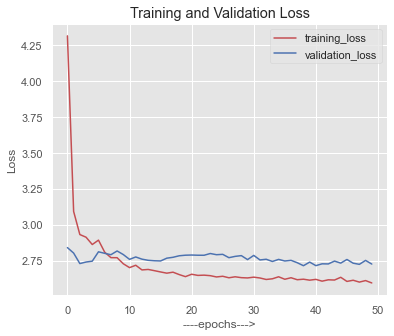

In [26]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()